# MENA Devs Survey (2017) Analysis
## Second Draft -- October 2017

### Abstract
This is a draft and a work in progress. Treat it and the results as such.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# General configuration
sns.set(font_scale=1.4)

# plt.style.use('ggplot')
%matplotlib inline

### Read Data from the CSV file

```
current directory: <main project folder>/analysis/
data location: <main project folder>/raw_data/
```

In [2]:
raw_data_file = "../raw_data/MD_Survey-29062017.csv"
data = pd.read_csv(raw_data_file, sep=",", index_col=0)

In [3]:
data.head()

,age_group,gender,self_identification,occupation,in_lebanon,experience_range,salary_range,skills,employment_status,company_size,job_satisfaction,employment_interest,education_level,learning_channels,md_usefulness,startup_interest,jobboard_interest,OS
ID,,,,,,,,,,,,,,,,,,
1,31 - 40,Male,"Software Engineer,Software Developer,,,,,Team ...",Technical Manager,1,11+,80000-90000,"SQL,,,,,,,,,,Java,,, Python,, C#,,,,,,,,,,Post...",Employed Full-Time,61 - 100 people,4,0,University Degree,"Technical Articles,,,,,,Books,,,Online Videos,,,,",5,0,0,macOS
2,25 - 30,I prefer not to share,"Software Engineer,,,,,,Team Leader,,,,,,,,,,,,...",Quality engineer,0,6-10,50000-60000,",,,,,,,,,,,,, Python,,,,,,,,,,,,,MySQL,,,git,,...",Employed Full-Time,more than 1000 people,11,0,Masters Degree,"Technical Articles,,,,,,,,,,,,,",6,0,0,Linux
3,25 - 30,Male,"Software Engineer,,Back-End Developer,,,,Team ...",Technical Director,1,11+,50000-60000,"SQL,,,,,,,JavaScript,,Arduino / Raspberry Pi,J...",Employed Full-Time,5 - 9 people,10,0,High School Degree,"Technical Articles,Academic Publications,MENA ...",6,0,2,macOS
4,25 - 30,Male,",Software Developer,Back-End Developer,Front-E...",Trainer/Teacher,1,11+,10000,"SQL,,,,,,,JavaScript,,,,,PHP, Python, SQL Serv...",Employed Full-Time,5 - 9 people,11,0,Masters Degree,"Technical Articles,Academic Publications,,,,,,...",3,1,3,Linux
5,31 - 40,Male,"Software Engineer,Software Developer,Back-End ...",Software Engineer,1,6-10,40000-50000,"SQL,,,,,,,JavaScript,,,,,PHP,, SQL Server, C#,...",Employed Full-Time,101 - 500 people,11,0,Masters Degree,"Technical Articles,,MENA Devs Chats,Meetups,Co...",7,1,2,macOS


### Helper Methods

In [33]:
def plot_correlation_map( df , figsz = (12,10) ):
        corr = df.corr()
        _ , ax = plt.subplots( figsize = figsz )
        cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
        _ = sns.heatmap(
            corr, 
            cmap = cmap,
            square=True, 
            cbar_kws={ 'shrink' : .9 }, 
            ax=ax, 
            annot = True, 
            annot_kws = { 'fontsize' : 12 }
        )

### Data Cleanup

#### Cleanup and reorganization into a new data frame

In [4]:
# Restrict the data to professionals residing in Lebanon only
data = data[data['in_lebanon'] == 1]

#### Q.0. What is the population size?

In [5]:
print("Population Size: {}".format(len(data)))

Population Size: 99


### Gender Analysis
#### Q.1.1 To which genders do the respondants belong to?

In [6]:
gender_data = pd.DataFrame(data['gender'].value_counts())
x_values = gender_data.index
y_values = data['gender'].value_counts()
gender_data

,gender
Male,89
Female,7
I prefer not to share,2
Other,1


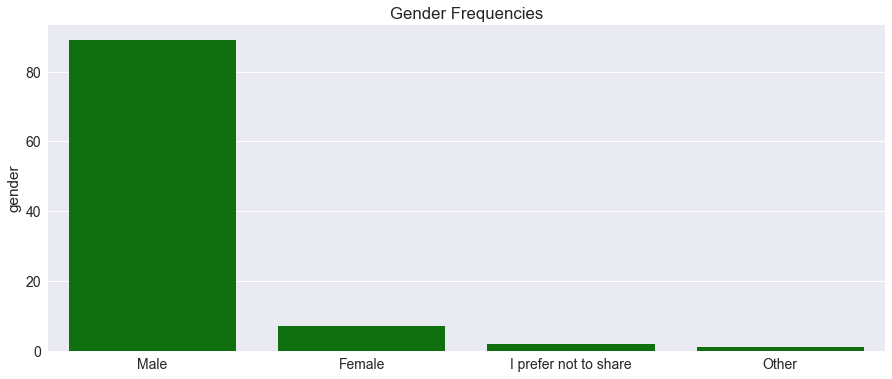

In [7]:
# Plot
plt.figure(figsize=(15,6))
sns.barplot(x_values, y_values, color="green")
plt.title("Gender Frequencies")

#### Q.1.2 What are the occupations of the male respondants?

In [8]:
male_occupations = data[data['gender'] == 'Male']['occupation'].value_counts()
female_occupations = data[data['gender'] == 'Female']['occupation'].value_counts()

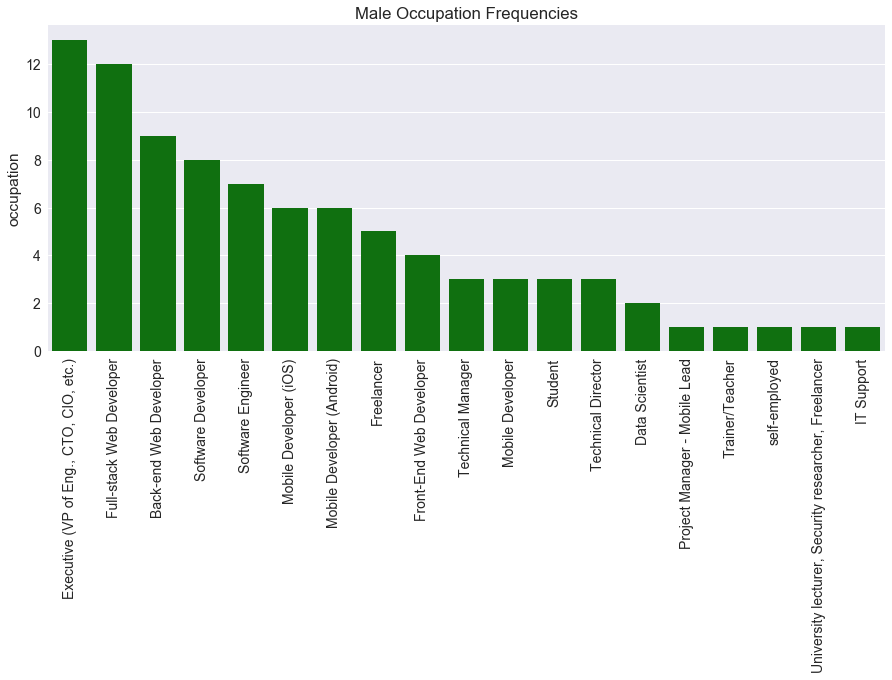

In [9]:
# Plotting The "MALE" Occupations
plt.figure(figsize=(15,6))
sns.barplot(male_occupations.index.values, male_occupations, color="green")
plt.xticks(rotation=90)
plt.title("Male Occupation Frequencies")

#### Q.1.3 What are the occupations of the Female respondants?

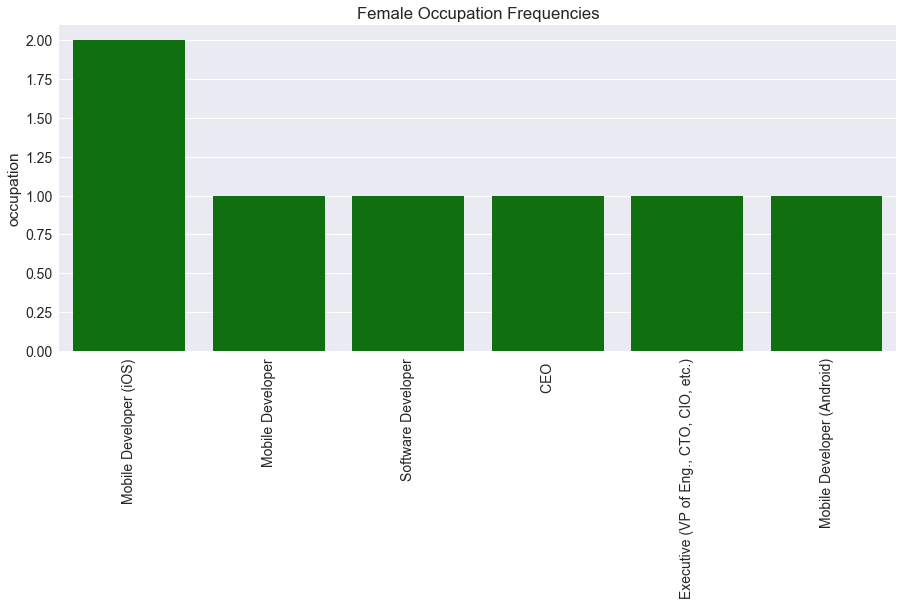

In [10]:
# Plotting The "FEMALE" Occupations
plt.figure(figsize=(15,6))
sns.barplot(female_occupations.index.values, female_occupations, color="green")
plt.xticks(rotation=90)
plt.title("Female Occupation Frequencies")

### Age Analysis

In [11]:
data.columns

Index(['age_group', 'gender', 'self_identification', 'occupation',
       'in_lebanon', 'experience_range', 'salary_range', 'skills',
       'employment_status', 'company_size', 'job_satisfaction',
       'employment_interest', 'education_level', 'learning_channels',
       'md_usefulness', 'startup_interest', 'jobboard_interest', 'OS'],
      dtype='object')

#### Data Cleanup
In this particular case and to make it easy to work with age groups, "< 20" (Less than 20) and "> 40" (Higher than 40) have been replaced with the integers "20" and "40" respectively. This does not mean that the midpoint for these groups are 20 or 40! This is still an **open ended grouped frequency distribution**.

In [12]:
data['age_group'].unique()

array(['31 - 40', '25 - 30', '20 - 24', '< 20', '> 40'], dtype=object)

In [13]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

def ageGroupMidpoint(input):
    repls = {'> ': '', '< ': ''}
    x = input.split(' - ')
    if (len(x) > 1):
        # Return the Midpoint Xm
        return (int(x[0]) + int(x[1]))/2
    # Replace < and > with 20 and 40 respectively
    return int(replace_all(input, repls))

# The group [20 - 25] is replaced by its midpoint Xm = (low + high)/2
data['age_group_MP'] = data['age_group'].map(lambda x: ageGroupMidpoint(x))
age_frequencies = pd.DataFrame(data['age_group_MP'].value_counts())
age_frequencies.sort_index(inplace=True)
age_frequencies

,age_group_MP
20.0,5
22.0,23
27.5,44
35.5,25
40.0,2


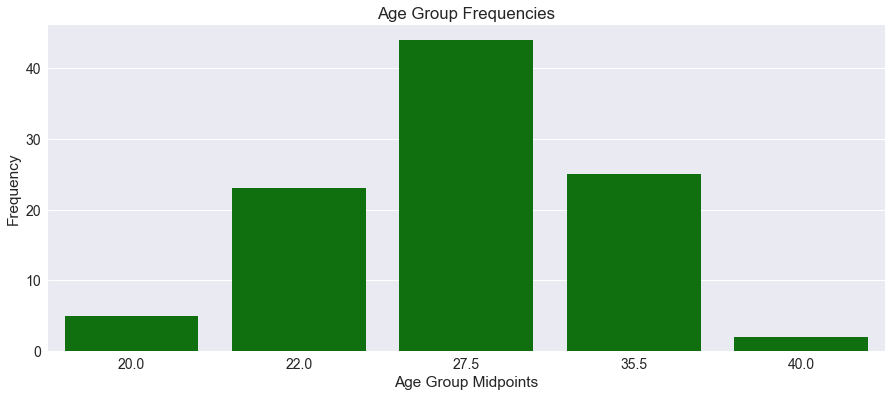

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(age_frequencies.index.values, age_frequencies['age_group_MP'].values, color="green")
plt.xlabel('Age Group Midpoints')
plt.ylabel('Frequency')
plt.title("Age Group Frequencies")

### Salary Analysis

#### Data Cleanup
1. To make it easier to  work with salary groups, `90000+` was replaced with `90000`. This does not mean that the midpoint for this groups is `90000`! This is still an **open ended grouped frequency distribution**.
2. The ranges were replaced by the `Midpoint (Xm)` for each group
3. These groups represent the **YEARLY salaries** for each respondant

In [15]:
data['salary_range'].unique()

array(['80000-90000', '50000-60000', '10000', '40000-50000', '30000-40000',
       '20000-30000', '10000-20000', '90000+', '0', '60000-70000',
       '70000-80000'], dtype=object)

In [16]:
def salaryGroupMidpoint(input):
    repls = {'+': ''}
    x = input.split('-')
    if (len(x) > 1):
        # Return the Midpoint Xm
        return (int(x[0]) + int(x[1]))/2
    # Just remove the + from the last group
    return int(replace_all(input, repls))

data['salary_range_MP'] = data['salary_range'].map(lambda x: salaryGroupMidpoint(x))

In [17]:
salary_frequencies = pd.DataFrame(data['salary_range_MP'].value_counts())
salary_frequencies.sort_index(inplace=True)
salary_frequencies

,salary_range_MP
0.0,7
10000.0,10
15000.0,21
25000.0,26
35000.0,13
45000.0,5
55000.0,7
65000.0,1
75000.0,2
85000.0,2


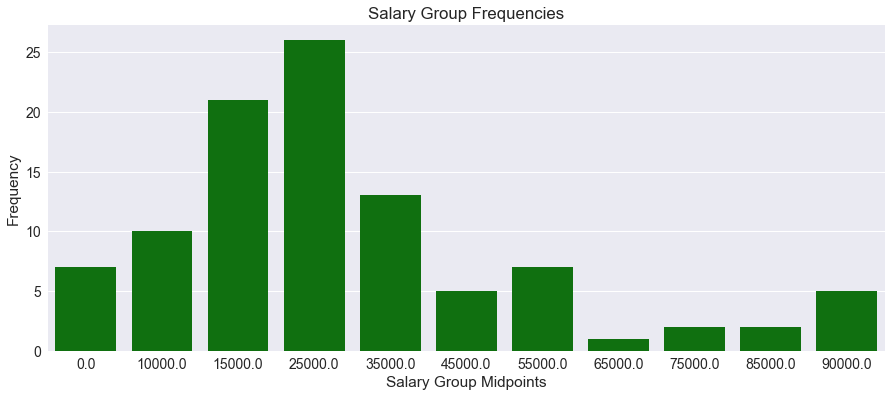

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(salary_frequencies.index.values, salary_frequencies['salary_range_MP'].values, color="green")
plt.xlabel('Salary Group Midpoints')
plt.ylabel('Frequency')
plt.title("Salary Group Frequencies")

### Duration of Professional Experience Analysis

#### Data Cleanup

In [19]:
data['experience_range'].unique()

array(['11+', '6-10', '3-5', '0-1', '1-2'], dtype=object)

In [20]:
def experienceGroupMidpoint(input):
    repls = {'+': ''}
    x = input.split('-')
    if (len(x) > 1):
        # Return the Midpoint Xm
        return (int(x[0]) + int(x[1]))/2
    # Just remove the + from the last group
    return int(replace_all(input, repls))

data['experience_range_MP'] = data['experience_range'].map(lambda x: experienceGroupMidpoint(x))

In [21]:
experience_frequencies = pd.DataFrame(data['experience_range_MP'].value_counts())
experience_frequencies.sort_index(inplace=True)
experience_frequencies

,experience_range_MP
0.5,15
1.5,14
4.0,27
8.0,23
11.0,20


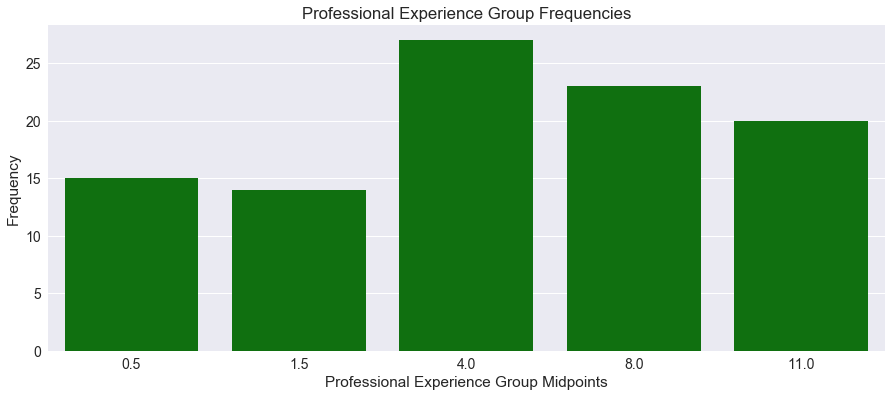

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(experience_frequencies.index.values, experience_frequencies['experience_range_MP'].values, color="green")
plt.xlabel('Professional Experience Group Midpoints')
plt.ylabel('Frequency')
plt.title("Professional Experience Group Frequencies")

### Relationship between Gender, Professional Experience Period, Age and Annual Salary

1. This only considers respondants who are employed on a **Full-Time basis**

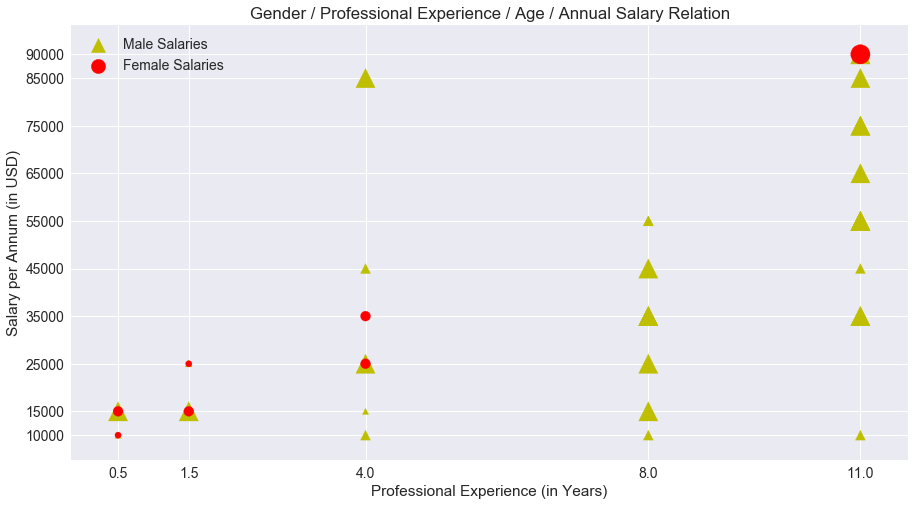

In [179]:
plt.figure(figsize=(15,8))

male_data = data.loc[(data['gender'] == 'Male') & (data['employment_status'] == 'Employed Full-Time')]
female_data = data.loc[(data['gender'] == 'Female') & (data['employment_status'] == 'Employed Full-Time')]
# We changed the scale to exp(x/6) so that we can observe the variations
# It's a simple amplification of the values for visual effects only
m_scale = np.exp(male_data['age_group_MP']/6)
f_scale = np.exp(female_data['age_group_MP']/6)

plt.xticks(data['experience_range_MP'].unique())
plt.yticks(data['salary_range_MP'].unique())
plt.scatter(male_data['experience_range_MP'], male_data['salary_range_MP'], s=m_scale, marker='^', color='y')
plt.scatter(female_data['experience_range_MP'], female_data['salary_range_MP'], s=f_scale, marker='o', color='r')
plt.legend(('Male Salaries', 'Female Salaries'),loc=0)
plt.xlabel('Professional Experience (in Years)')
plt.ylabel('Salary per Annum (in USD)')
plt.title('Gender / Professional Experience / Age / Annual Salary Relation')

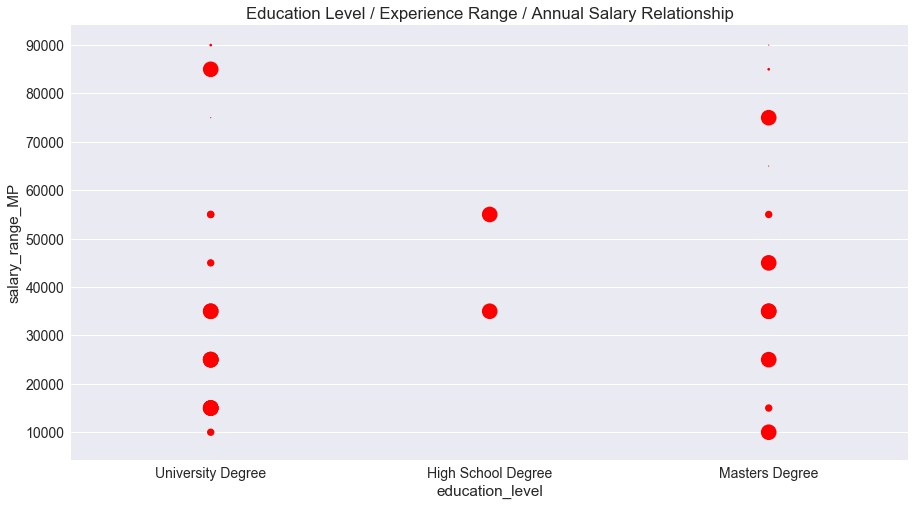

In [180]:
plt.figure(figsize=(15,8))
m_scale = np.exp(male_data['experience_range_MP']/4)
sns.stripplot(x='education_level', y='salary_range_MP', s=m_scale, marker='o', color='r', data=male_data)
plt.title('Education Level / Experience Range / Annual Salary Relationship')

#### Conclusion?
Absolutely nothing can be learned from the above. We need more granularity.